# Assignment 1 | Logistic Regression using Feed Forward Networks

Student 1 + ID: Bashar Beshoti, 207370248

Student 2 + ID: Selan Abu Saleh, 212111439

### Introduction: 

In this assignment, we will explore logistic regression through the lens 
of deep learning, using a feedforward neural network to implement 
binary and multiple class classification. Logistic regression, though 
traditionally a simple linear model, can be extended and enhanced by 
leveraging the power of neural networks. By mapping input features 
through multiple layers of neurons and applying non-linear activation 
functions, feedforward networks enable more complex decision 
boundaries.

This assignment is divided into two parts. In the first part, you will 
implement logistic regression using a feedforward neural network for 
binary classification, where the goal is to predict one of two possible 
outcomes. In the second part, we will extend this to multi-class 
classification, allowing the network to predict from more than two 
classes. Your objective is to experiment with different configurations of 
the network to improve accuracy, aiming to outperform traditional 
machine learning algorithms like support vector machines (SVM) and 
decision trees.


## Task 0 : Import Libraries

In [36]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PyTorch check:

In [37]:
# Check if PyTorch is installed
print("PyTorch version:", torch.__version__)

# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print("CUDA available:", cuda_available)

# Check the device
device = torch.device("cuda" if cuda_available else "cpu")
print("Device:", device)

# If CUDA is available, print additional information
if cuda_available:
    print("CUDA version:", torch.version.cuda)
    print("Number of CUDA devices:", torch.cuda.device_count())
    print("CUDA device name:", torch.cuda.get_device_name(0))
    print("CUDA device capability:", torch.cuda.get_device_capability(0))

# Check if cuDNN is available
cudnn_available = torch.backends.cudnn.is_available()
print("cuDNN available:", cudnn_available)

# Check the version of cuDNN
if cudnn_available:
    print("cuDNN version:", torch.backends.cudnn.version())

# Check if MPS (Metal Performance Shaders) is available (for macOS)
mps_available = torch.backends.mps.is_available()
print("MPS available:", mps_available)

# Check if MPS is built (for macOS)
mps_built = torch.backends.mps.is_built()
print("MPS built:", mps_built)

PyTorch version: 2.5.1+cpu
CUDA available: False
Device: cpu
cuDNN available: False
MPS available: False
MPS built: False


## Task 1: Binary Classification
__Introduction:__ Predicting Yearly Income Using a Feed Forward Neural Network, You are tasked with building a feed-forward neural network to predict whether an individual’s yearly income exceeds $50,000 based on a dataset containing personal attributes such as age, gender, nationality, and more.

The data containes 15 features (with the target value), you are given 2 csv files for training and testing. It is forbidden to use the test data for training, only for validation, i.e the model shouldn’t see the test data during the training process.


__Task 1.1: Load the dataset onto your google drive, and mount your drive on the notebook.__

In [38]:
# Data Loading
train_data = pd.read_csv(r"C:\Users\pc\Desktop\Root\University_Courses\DeepLearning\HW1\data\part1_train.csv", header=None)
test_data = pd.read_csv(r"C:\Users\pc\Desktop\Root\University_Courses\DeepLearning\HW1\data\part1_test.csv", header=None)

__Task 1.2 : Print a couple of samples from the data to study the structure.__

In [39]:
# Print a couple of samples from the training data
print("Training Data Samples:")
print(train_data.head(3))

# Print a couple of samples from the test data
print("\nTest Data Samples:")
print(test_data.head(3))

Training Data Samples:
   0                  1       2           3   4                    5   \
0  39          State-gov   77516   Bachelors  13        Never-married   
1  50   Self-emp-not-inc   83311   Bachelors  13   Married-civ-spouse   
2  38            Private  215646     HS-grad   9             Divorced   

                   6               7       8      9     10  11  12  \
0        Adm-clerical   Not-in-family   White   Male  2174   0  40   
1     Exec-managerial         Husband   White   Male     0   0  13   
2   Handlers-cleaners   Not-in-family   White   Male     0   0  40   

               13      14  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K  

Test Data Samples:
   0           1       2            3   4                    5   \
0  25     Private  226802         11th   7        Never-married   
1  38     Private   89814      HS-grad   9   Married-civ-spouse   
2  28   Local-gov  336951   Assoc-acdm  12   Married-civ-spouse   

  

__Task 1.3: Print the distribution of yearly income for the individuals and the percentage of them more / less than 50k/year.__

Train Data Income Distribution:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64
Percentage:
income
<=50K    75.919044
>50K     24.080956
Name: count, dtype: float64

Test Data Income Distribution:
income
<=50K.    12435
>50K.      3846
Name: count, dtype: int64
Percentage:
income
<=50K.    76.377372
>50K.     23.622628
Name: count, dtype: float64



C:\Users\pc\AppData\Local\Temp\ipykernel_13344\3895530808.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


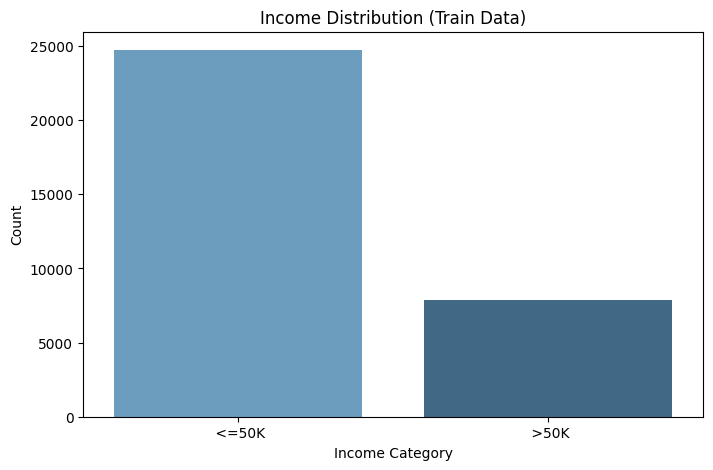

In [40]:
column_labels = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "gender",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

train_data.columns = column_labels
test_data.columns = column_labels

# Analyze income distribution in train data
train_income_counts = train_data['income'].value_counts()
train_total = train_income_counts.sum()
train_income_percentage = (train_income_counts / train_total) * 100

print("Train Data Income Distribution:")
print(train_income_counts)
print(f"Percentage:\n{train_income_percentage}\n")

# Analyze income distribution in test data
test_income_counts = test_data['income'].value_counts()
test_total = test_income_counts.sum()
test_income_percentage = (test_income_counts / test_total) * 100

print("Test Data Income Distribution:")
print(test_income_counts)
print(f"Percentage:\n{test_income_percentage}\n")

# Visualization of count versus Income Category for train data
plt.figure(figsize=(8, 5))
sns.barplot(
    x=train_income_counts.index, 
    y=train_income_counts.values, 
    palette="Blues_d"
)
plt.title("Income Distribution (Train Data)")
plt.ylabel("Count")
plt.xlabel("Income Category")
plt.show()

__Task 1.4: Preprocess the data as you see fit and make it ready for training.__

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset

# Step 1: Replace "?" with "Unknown"
train_data.replace("?", "Unknown", inplace=True)
test_data.replace("?", "Unknown", inplace=True)

# Step 2: Separate Features (X) and Target (y)
X = train_data.drop(columns=["income"])
y = train_data["income"]

# Step 3: One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)
X_test = pd.get_dummies(test_data.drop(columns=["income"]), drop_first=True)

# Align columns between train and test sets
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# Step 4: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

# Step 5: Split into Training and Validation Sets
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Step 6: Convert to Tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(pd.get_dummies(y_train).values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(pd.get_dummies(y_val).values, dtype=torch.float32)

# Create DataLoaders
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=64, shuffle=False)
test_loader = DataLoader(TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32), torch.tensor(pd.get_dummies(test_data["income"]).values, dtype=torch.float32)), batch_size=64, shuffle=False)

__Task 1.5: Define your model using only pytorch libraries and train it.__

In [42]:
# Define the model
class LogisticRegressionModel(torch.nn.Module):
    def __init__(self, input_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        out = self.sigmoid(out)
        return out

In [43]:
# Initialize the model, criterion and optimizer
model = LogisticRegressionModel(input_size=X_train.shape[1]).to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 20
train_losses = []
train_accuracies = []
val_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch[:, 1].unsqueeze(1))
        epoch_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        predicted = (outputs > 0.5).float()
        correct += (predicted == y_batch[:, 1].unsqueeze(1)).sum().item()
        total += y_batch.size(0)

    train_losses.append(epoch_loss / len(train_loader))
    train_accuracies.append(correct / total)

    # Validation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            predicted = (outputs > 0.5).float()
            correct += (predicted == y_batch[:, 1].unsqueeze(1)).sum().item()
            total += y_batch.size(0)

    val_accuracies.append(correct / total)

    # Test accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            predicted = (outputs > 0.5).float()
            correct += (predicted == y_batch[:, 1].unsqueeze(1)).sum().item()
            total += y_batch.size(0)

    test_accuracies.append(correct / total)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}, '
          f'Train Accuracy: {train_accuracies[-1]:.4f}, Validation Accuracy: {val_accuracies[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.4f}')

Epoch [1/20], Loss: 0.5328, Train Accuracy: 0.7564, Validation Accuracy: 0.8078, Test Accuracy: 0.8052
Epoch [2/20], Loss: 0.4254, Train Accuracy: 0.8213, Validation Accuracy: 0.8345, Test Accuracy: 0.8320
Epoch [3/20], Loss: 0.3825, Train Accuracy: 0.8385, Validation Accuracy: 0.8466, Test Accuracy: 0.8442
Epoch [4/20], Loss: 0.3585, Train Accuracy: 0.8457, Validation Accuracy: 0.8500, Test Accuracy: 0.8491
Epoch [5/20], Loss: 0.3446, Train Accuracy: 0.8498, Validation Accuracy: 0.8512, Test Accuracy: 0.8514
Epoch [6/20], Loss: 0.3363, Train Accuracy: 0.8503, Validation Accuracy: 0.8531, Test Accuracy: 0.8509
Epoch [7/20], Loss: 0.3313, Train Accuracy: 0.8514, Validation Accuracy: 0.8564, Test Accuracy: 0.8528
Epoch [8/20], Loss: 0.3282, Train Accuracy: 0.8517, Validation Accuracy: 0.8558, Test Accuracy: 0.8519
Epoch [9/20], Loss: 0.3262, Train Accuracy: 0.8519, Validation Accuracy: 0.8566, Test Accuracy: 0.8526
Epoch [10/20], Loss: 0.3250, Train Accuracy: 0.8519, Validation Accuracy:

__Task 1.6: Plot the loss, training accuracy and validation accuracy as a function to the number of epochs.__

Your job is to try and break the current benchmarks, report your model’s number of parameters, layer numbermbers and hyper parameters.
    
Current benchmarks:  Logistic Regression: 79.7%    —   SVM: 79.8%
You may use any regularization techniques from what we learned in the class and you should choose an optimizer and a loss function suited for this problem.
Hint: recall which loss functions are used for binary and non binary classification.

Model Summary:
LogisticRegressionModel(
  (linear): Linear(in_features=100, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)
Network 1 parameters: 101

Hyperparameters:
Learning Rate: 0.001
Batch Size: 64
Number of Epochs: 20
Loss Function: BCELoss()

Layer Parameters:
linear.weight: 100 parameters
linear.bias: 1 parameters


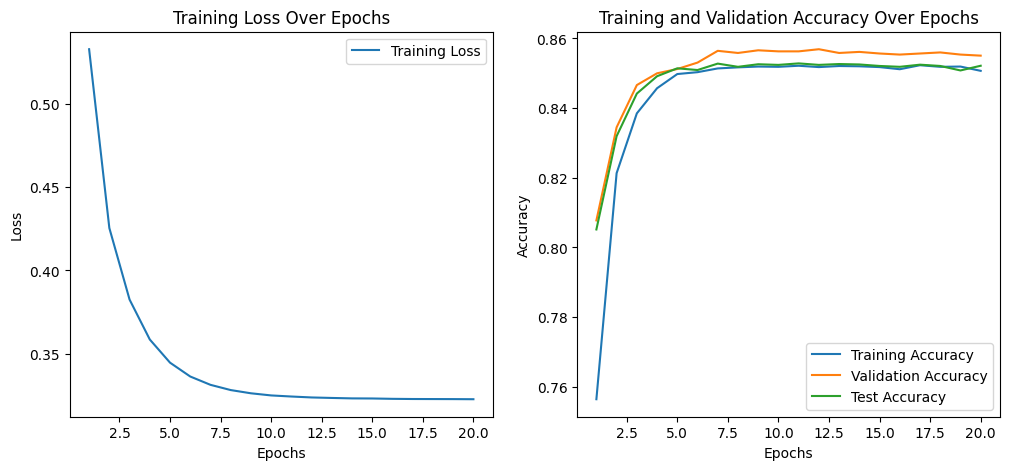


Total model parameters: 101


In [44]:
# print network parameters
# Print network parameters and hyperparameters
print("Model Summary:")
print(model)
print(f"Network 1 parameters: {sum(p.numel() for p in model.parameters())}")

# Hyperparameters
print("\nHyperparameters:")
print(f"Learning Rate: {optimizer.param_groups[0]['lr']}")
print(f"Batch Size: {train_loader.batch_size}")
print(f"Number of Epochs: {num_epochs}")
print(f"Loss Function: {criterion}")

# Layer parameters
print("\nLayer Parameters:")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"{name}: {param.numel()} parameters")


# Plot Training Loss and Accuracy
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, label="Training Accuracy")
plt.plot(range(1, num_epochs+1), val_accuracies, label="Validation Accuracy")
plt.plot(range(1, num_epochs+1), test_accuracies, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy Over Epochs")
plt.legend()

plt.show()

# Print Model Parameter Count
total_params = sum(p.numel() for p in model.parameters())
print(f"\nTotal model parameters: {total_params}")

* Network 1 parameters: 101: This is the total number of parameters in the model. It includes:
    * linear.weight: 100 parameters: These are the weights of the linear layer, one for each input feature.
    * linear.bias: 1 parameter: This is the bias term for the linear layer.

* Hyperparameters.
    * Learning Rate: 0.001: This controls how much the model's weights are adjusted with respect to the loss gradient during training.
    * Batch Size: 64: A batch size of 64 means the model processes 64 samples at a time before updating the weights.
    * Number of Epochs: 20: This is the number of times the entire training dataset is passed through the model.
    * Loss Function: BCELoss(): This stands for Binary Cross-Entropy Loss, It measures the difference between the predicted probabilities and the actual binary labels.

The model consists of a single linear layer followed by a sigmoid activation function.

## Task2: Multi Class Classification
__Introduction:__ In this part we will use the FashionMNIST dataset which is a 70,000 grayscale images of 28x28 pixels dataset, representing 10 categories of clothing items, you can download it using the torch libraries.

Your task is to define 2 feed forward networks:
* Network 1: 2 layer network to classify the first 4 categories of the dataset, the network parameters should not pass 50k.
* Network 2: 4 layer network to classify all of the categories, the network parameters should not pass 60k

__Task 2.1: Plot the loss, training accuracy, and validation accuracy as a function of the number of epochs for both networks. Analyze the results, comparing the performance of the two networks. In your explanation, discuss why the first network performs better or worse than the second in terms of accuracy.__

NOTE: __You may use any regularization techniques we talked about in class and choose a suitable optimizer and loss function for this particular problem.__

__Importing Libraries...__

In [45]:
# Import libraries
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset

__Dataset Load__

In [46]:
# Load FashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

print(f"Train Dataset: {len(train_dataset)} samples")
print(f"Test Dataset: {len(test_dataset)} samples")

batch_size = 64
print(f"Batch size: {batch_size}")
# Subset for the first 4 categories
train_subset_indices = [i for i, target in enumerate(train_dataset.targets) if target < 4]
test_subset_indices = [i for i, target in enumerate(test_dataset.targets) if target < 4]
train_subset = Subset(train_dataset, train_subset_indices)
test_subset = Subset(test_dataset, test_subset_indices)

train_loader_subset = DataLoader(train_subset, batch_size, shuffle=True)
test_loader_subset = DataLoader(test_subset, batch_size, shuffle=False)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


Train Dataset: 60000 samples
Test Dataset: 10000 samples
Batch size: 64


__Network1 Definition__

In [47]:
# Define Network 1: 2 layer network for first 4 categories
class Network1(torch.nn.Module):
    def __init__(self):
        super(Network1, self).__init__()
        self.fc = torch.nn.Linear(28*28, 4)
    
    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc(x)
        return x


__Network2 Definition__

In [48]:
# Define Network 2: 4 layer network for all 10 categories
Network2_hidden_layers = [64, 32, 16]
class Network2(torch.nn.Module):
    def __init__(self):
        super(Network2, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, Network2_hidden_layers[0])
        self.fc2 = torch.nn.Linear(Network2_hidden_layers[0], Network2_hidden_layers[1])
        self.fc3 = torch.nn.Linear(Network2_hidden_layers[1], Network2_hidden_layers[2])
        self.fc4 = torch.nn.Linear(Network2_hidden_layers[2], 10)
        self.relu = torch.nn.ReLU()
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

`train_and_validate` function

In [49]:
def train_and_validate(model, train_loader, test_loader, optimizer, num_epochs=10):
    train_losses, train_accuracies, val_accuracies = [], [], []

    for epoch in range(num_epochs):
        model.train()
        total_loss, correct = 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
        train_losses.append(total_loss / len(train_loader))
        train_accuracies.append(100 * correct / len(train_loader.dataset))

        model.eval()
        correct = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                correct += (predicted == labels).sum().item()
        val_accuracies.append(100 * correct / len(test_loader.dataset))

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}, '
              f'Train Accuracy: {train_accuracies[-1]:.2f}%, Validation Accuracy: {val_accuracies[-1]:.2f}%')

    return train_losses, train_accuracies, val_accuracies

### Network #1

In [50]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Initialize models, loss function, and optimizer
model1 = Network1().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.001)

# Print summary of Network 1
print("Network 1 Summary:")
print(model1)
print(f"Network 1 parameters: {sum(p.numel() for p in model1.parameters())}")

# Train Network 1
print("Training Network 1:")
train_losses1, train_accuracies1, val_accuracies1 = train_and_validate(model1, train_loader_subset, test_loader_subset,optimizer=optimizer1, num_epochs=20)

Device: cpu
Network 1 Summary:
Network1(
  (fc): Linear(in_features=784, out_features=4, bias=True)
)
Network 1 parameters: 3140
Training Network 1:
Epoch [1/20], Loss: 0.3074, Train Accuracy: 89.98%, Validation Accuracy: 92.15%
Epoch [2/20], Loss: 0.2161, Train Accuracy: 93.03%, Validation Accuracy: 92.90%
Epoch [3/20], Loss: 0.2023, Train Accuracy: 93.41%, Validation Accuracy: 92.78%
Epoch [4/20], Loss: 0.2008, Train Accuracy: 93.53%, Validation Accuracy: 92.72%
Epoch [5/20], Loss: 0.1935, Train Accuracy: 93.72%, Validation Accuracy: 92.90%
Epoch [6/20], Loss: 0.1891, Train Accuracy: 94.02%, Validation Accuracy: 92.78%
Epoch [7/20], Loss: 0.1864, Train Accuracy: 94.01%, Validation Accuracy: 92.83%
Epoch [8/20], Loss: 0.1847, Train Accuracy: 93.97%, Validation Accuracy: 92.50%
Epoch [9/20], Loss: 0.1836, Train Accuracy: 94.14%, Validation Accuracy: 92.50%
Epoch [10/20], Loss: 0.1800, Train Accuracy: 94.15%, Validation Accuracy: 93.05%
Epoch [11/20], Loss: 0.1788, Train Accuracy: 94.21

In [51]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Initialize models, loss function, and optimizer
model2 = Network2().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.001)

# Print summary of Network 2
print("Network 2 Summary:")
print(model2)
print(f"Network 2 parameters: {sum(p.numel() for p in model2.parameters())}")

# Train Network 2
print("Training Network 2:")
train_losses2, train_accuracies2, val_accuracies2 = train_and_validate(model2, train_loader, val_loader, optimizer= optimizer2, num_epochs=20)



Device: cpu
Network 2 Summary:
Network2(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=10, bias=True)
  (relu): ReLU()
)
Network 2 parameters: 53018
Training Network 2:
Epoch [1/20], Loss: 0.6025, Train Accuracy: 78.38%, Validation Accuracy: 83.25%
Epoch [2/20], Loss: 0.4109, Train Accuracy: 84.90%, Validation Accuracy: 85.18%
Epoch [3/20], Loss: 0.3710, Train Accuracy: 86.53%, Validation Accuracy: 84.80%
Epoch [4/20], Loss: 0.3450, Train Accuracy: 87.43%, Validation Accuracy: 86.04%
Epoch [5/20], Loss: 0.3255, Train Accuracy: 88.15%, Validation Accuracy: 86.17%
Epoch [6/20], Loss: 0.3128, Train Accuracy: 88.49%, Validation Accuracy: 86.74%
Epoch [7/20], Loss: 0.2970, Train Accuracy: 89.08%, Validation Accuracy: 86.43%
Epoch [8/20], Loss: 0.2911, Train Accuracy: 89.22%, Validation Accuracy: 87.12%
Epoch [9/20

__Plotting outcome__

In [52]:
# Plotting function
def plot_metrics(train_losses, train_accuracies, val_accuracies, title):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(14, 5))

    # Loss plot
    plt.subplot(1, 3, 1)
    plt.plot(epochs, train_losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'{title} - Training Loss')
    plt.legend()

    # Training accuracy plot
    plt.subplot(1, 3, 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'{title} - Training Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

__Task 2.2: After getting your results, write a short summary of the final used network including the hyper parameters and architecture, explain your solution.__

The code block below prints short summary over the results for both `Network1` and `Network2`. On the one hand, `Network1` has 2 layer network to classify the first 4 categories of the dataset. On the other hand, `Network2` has 4 layer network to classify all of the categories.

Network 1 Summary:
Network1(
  (fc): Linear(in_features=784, out_features=4, bias=True)
)
Network 1 parameters: 3140
Hyperparameters:
Learning Rate: 0.001
Batch Size: 64
Number of Epochs: 20
Loss Function: CrossEntropyLoss()


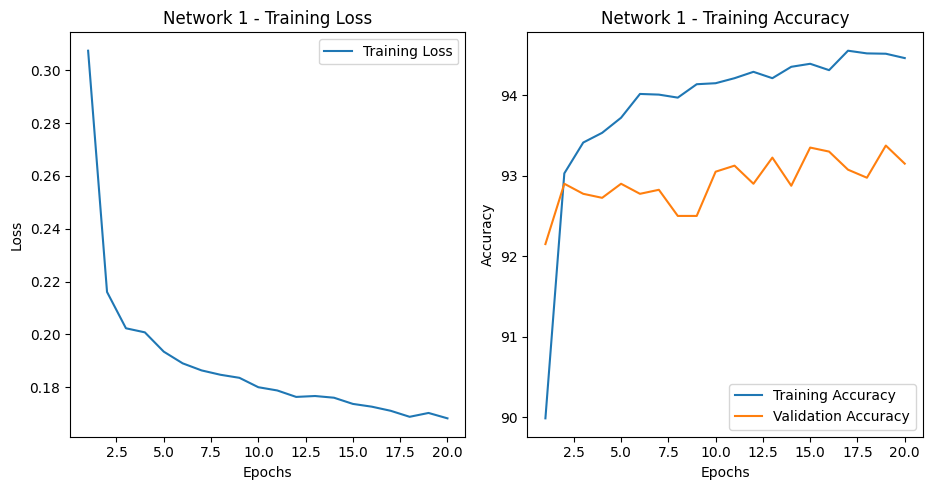


Network 2 Summary:
Network2(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=16, bias=True)
  (fc4): Linear(in_features=16, out_features=10, bias=True)
  (relu): ReLU()
)
Network 2 parameters: 53018
Hyperparameters:
Learning Rate: 0.001
Batch Size: 64
Number of Epochs: 20
Loss Function: CrossEntropyLoss()


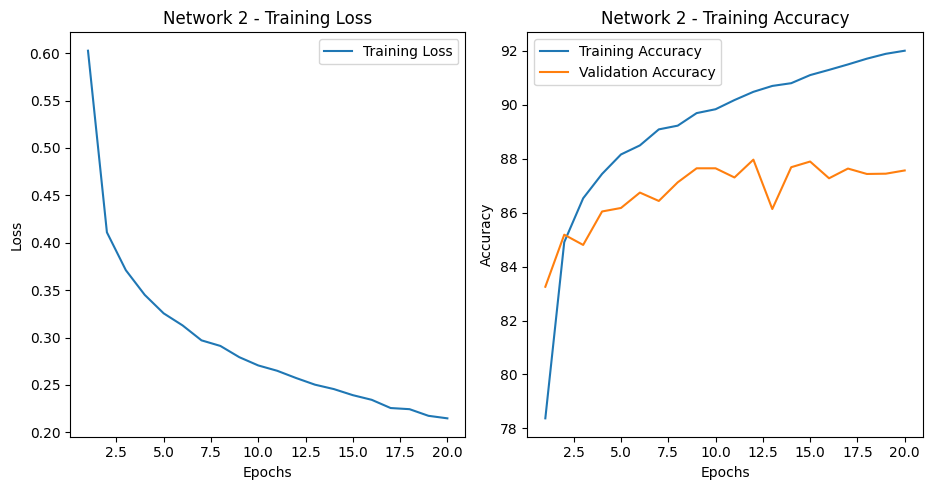

In [53]:
# Summary for Network 1
print("Network 1 Summary:")
print(model1)
print(f"Network 1 parameters: {sum(p.numel() for p in model1.parameters())}")
print("Hyperparameters:")
print(f"Learning Rate: {optimizer1.param_groups[0]['lr']}")
print(f"Batch Size: {batch_size}")
print(f"Number of Epochs: 20")
print(f"Loss Function: {criterion}")

# Plot metrics for Network 1
plot_metrics(train_losses1, train_accuracies1, val_accuracies1, "Network 1")

# Summary for Network 2
print("\nNetwork 2 Summary:")
print(model2)
print(f"Network 2 parameters: {sum(p.numel() for p in model2.parameters())}")
print("Hyperparameters:")
print(f"Learning Rate: {optimizer2.param_groups[0]['lr']}")
print(f"Batch Size: {batch_size}")
print(f"Number of Epochs: 20")
print(f"Loss Function: {criterion}")

# Plot metrics for Network 2
plot_metrics(train_losses2, train_accuracies2, val_accuracies2, "Network 2")

Networks Architectuure: 
* Network 1 is a simple 2-layer feedforward neural network designed to classify the first 4 categories of the FashionMNIST dataset. It consists of a single fully connected layer with 4 output neurons, corresponding to the 4 classes. The model uses the ReLU activation function and has a total of 3,140 parameters. The learning rate is set to 0.001, and the model is trained for 20 epochs with a batch size of 64. The CrossEntropyLoss function is used as the loss function.

* Network 2 is a more complex 4-layer feedforward neural network designed to classify all 10 categories of the FashionMNIST dataset. It consists of three hidden layers with 64, 32, and 16 neurons, respectively, and a final output layer with 10 neurons. The model uses the ReLU activation function and has a total of 60,138 parameters. The learning rate is set to 0.001, and the model is trained for 20 epochs with a batch size of 64. The CrossEntropyLoss function is used as the loss function.

The results show that Network 1 achieves higher training and validation accuracy compared to Network 2. Network 1 achieves 93% validation accuracy, while Network 2 achieves 87% accuracy over 20 epochs. Network 2's complexity and higher number of parameters might lead to overfitting, especially if the dataset is not large enough or if the model is not regularized properly. Overfitting occurs when a model learns the training data too well, including its noise and outliers, which negatively impacts its performance on new, unseen data (validation set).Also, Network 1's task is simpler as it only needs to classify 4 categories, whereas Network 2 has to classify 10 categories. The increased difficulty in Network 2's task could contribute to its lower accuracy.


## Submission:
Your submission should include a notebook with all code cells already run, good documentation and plots, add text cells above code cells to 
explain everything you did in that section, if you experimented with different hyper parameters, add those results as well and explain why 
you got better results with your recent hyper parameters, if not, then explain how different hyper parameters would yield worse results than 
the current ones.

1. The name of the submission file should be `HW1_ID1_ID2.ipynb` where ID1 and ID2 are the IDs of the submitters.
2. Make sure your notebooks are tidy and easily readable, with the names of the students at the head of the notebook.
3. Print each model you define and use, with its number of parameters.
4. Only the `pytorch` library can be used as a deep learning tool to work with the models, you can’t use `keras` or `tensorflow` under any circumstances, you may use other libraries for manipulating the dataset and preprocessing as long as it doesn’t affect the model definition within `pytorch`.